# HW 8 - PART 2 LINEAR DATA FITTING WITH UNCERTANTIES

In [1]:
#standard importing
from matplotlib import pyplot as plt
import numpy as np
import scipy.optimize as opt

In [2]:
#Read in the data to a numpy array
data = np.genfromtxt("HW8_2data.dat", names=True, dtype=None)
#ALWAYS CHECK OUT YOUR DATA FILE SO YOU CAN SEE WHATS GOING ON!!!!
# print out all columns we just got for free
data.dtype

dtype([('X', '<f8'), ('Y', '<f8'), ('Y_ERR', '<f8'), ('Z', '<f8'), ('Z_ERR', '<f8')])

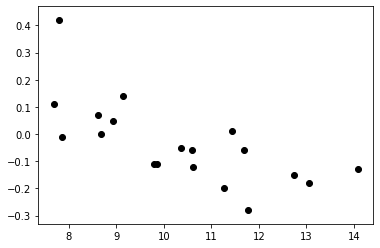

In [3]:
#First let's see what this data looks like
#fig = plt.figure(figsize=(15,10))
#ax = fig.add_subplot(111)
#ax.scatter(data['X'],data['Y'],s=20,c='black')
plt.scatter(data['X'], data['Y'], c='k')
# Cool! The data actually looks pretty linear so we can assume the function we are fitting *is* linear
plt.show()

In [4]:
# let's make a linear function the normal way
def linear(x, m, b):
    return m * x + b

raw:  -0.05818663749944188 0.5653511377902967


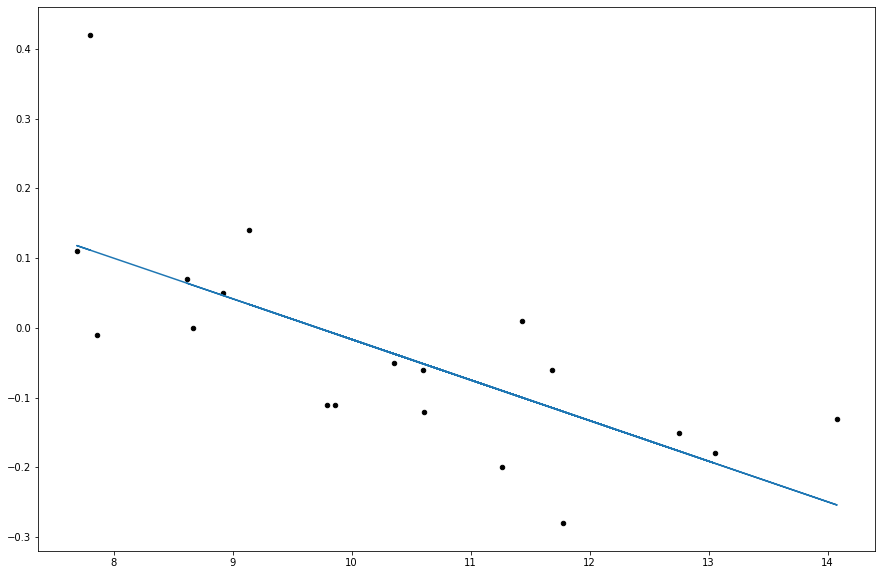

In [5]:
# let's do a linear fit to the data

popt, pcov = opt.curve_fit(linear, data['X'], data['Y'])
print("raw: ", *popt)


#writing figures this way is so elongated why cant we just write plt.scatter
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(data['X'],data['Y'],s=20,c='black')
ax.plot(data['X'],linear(data['X'], *popt))

plt.show()

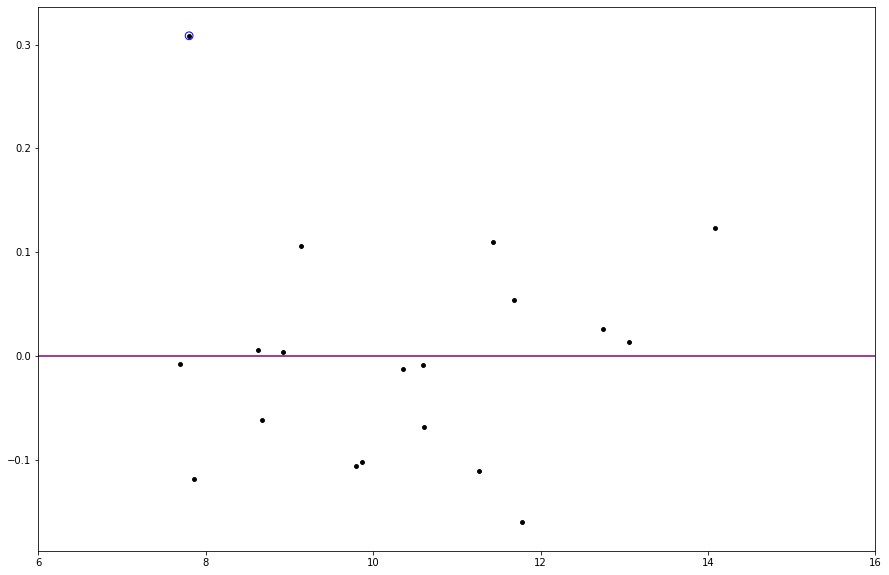

In [6]:
#Let's look into wich data are way off the fit.
#this is the equation of the residuals
residual = data['Y']-linear(data['X'],*popt)
x = np.linspace(5,20,1000)
#linspace is like arange, arange might be more friendly, but it is up to the person

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(data['X'],residual,s=15,c='black')
ax.plot(x,x*0.0,color='purple')
ax.set_xlim(6,16)

#highlighting the residuals that are further than 0.2 away from the value
outlier = np.absolute(residual)>0.2
ax.scatter(data['X'][outlier],residual[outlier],s=60,edgecolor='b',facecolor='none')
#line is flat because line-line is no line
plt.show()
#there is the one outlier!!

raw:  -0.05818663749944188 0.5653511377902967
outliers accounted for:  -0.04338146805673531 0.3967292540601484


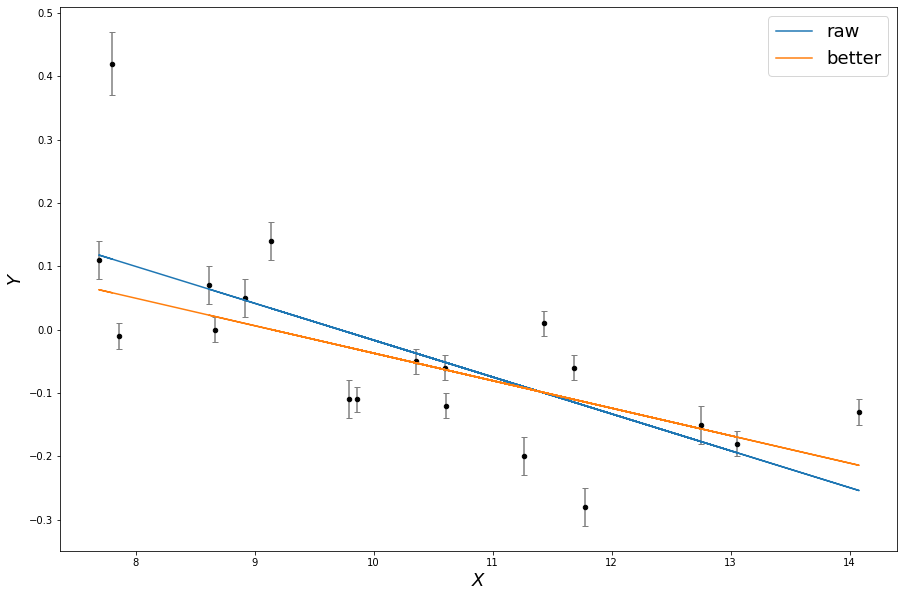

In [7]:
# our values for the raw data above:
# slope:    -0.058187
# intercept: 0.565351
popt, pcov = opt.curve_fit(linear, data['X'], data['Y'])
print("raw: ", *popt)

# we can use curve_fit to de-weight outliers automatically

# note, result is dependent on choice of loss function
# need to see method to trf in order to use least_squares instead of leastsq
# function removes outliers 
popt_clean, pcov = opt.curve_fit(linear, data['X'], data['Y'], method='trf', 
                                 loss='arctan', f_scale=0.20)
print("outliers accounted for: ", *popt_clean)

#plotting the two different fits
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(data['X'],data['Y'],s=20,c='black',zorder=2)
# cleaner error bars than last time, play around with the parameters
#just reading the errors from the table
ax.errorbar(data['X'],data['Y'],yerr=data['Y_ERR'], c='tab:gray', 
            fmt='.', markersize=1, capsize=3 ,zorder=0)

# along with our fits
ax.plot(data['X'],linear(data['X'], *popt), label='raw')
ax.plot(data['X'],linear(data['X'], *popt_clean), label='better')

ax.set_xlabel('$X$', fontsize=18)
ax.set_ylabel('$Y$', fontsize=18)

plt.legend(loc='best', fontsize=18)
plt.show()
#orange line is the line without the outlier, the fit is better
#not accounting for errors at all

the error stuff is: -0.038335615619586275 0.3463734445963487


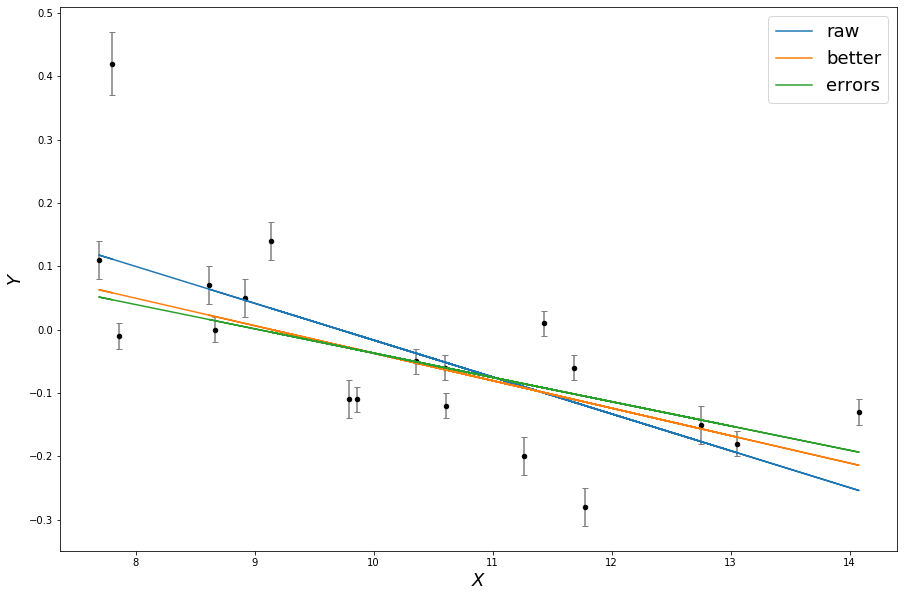

In [8]:
# lets account for the errors
# by pasing sigma, scipy knows to weight data according to their errors 
# naturally, sigma is expected to be the same size and correspond to y
# notice: this only accounts for y error
popt_err, pcov = opt.curve_fit(linear, data['X'], data['Y'], sigma=data['Y_ERR'])
print('the error stuff is:',*popt_err)

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(data['X'],data['Y'],s=20,c='black',zorder=2)
#here is the error bar graph piece
ax.errorbar(data['X'],data['Y'],yerr=data['Y_ERR'], c='tab:gray', 
            fmt='.', markersize=1, capsize=3 ,zorder=0)

# along with out fits
ax.plot(data['X'],linear(data['X'], *popt), label='raw')
ax.plot(data['X'],linear(data['X'], *popt_clean), label='better')
ax.plot(data['X'],linear(data['X'], *popt_err), label='errors')

ax.set_xlabel('$X$', fontsize=18)
ax.set_ylabel('$Y$', fontsize=18)

plt.legend(loc='best', fontsize=18)
plt.show()
#notice the line has been flattening over time

mean slope: -0.0580, mean intercept: 0.5634


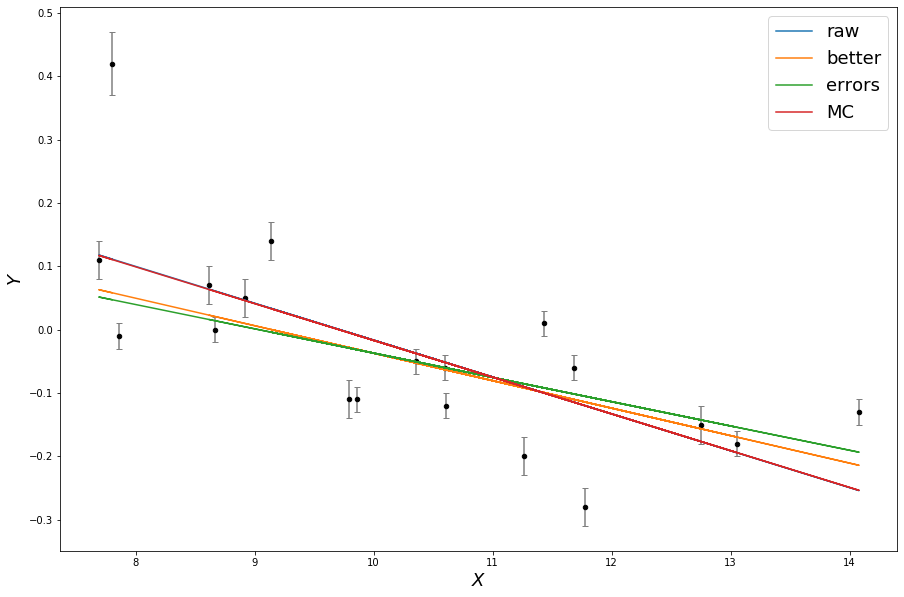

In [9]:
# Does this accurately explore the parameter space though?
# And what is the uncertainty on our data?
# What if we had x error bars?
#curve fit doesnt do this by itself, we will sample errors on the x-axis by monte carlo
# we'll explore a method utilizing the common "monte carlo" approach
#randomizing the weighting on things
#currently just checking the y-error
def mcFit(x, y, y_err):
    slopes = list()
    y_ints = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weights = np.random.randn(len(y))

        y_adj = y + y_err*weights
        x_adj = x  

        params, other = opt.curve_fit(linear, x_adj, y_adj)
        slopes.append(params[0])
        y_ints.append(params[1])
    
    return slopes, y_ints

slope, intercept = mcFit(data['X'], data['Y'], data['Y_ERR'])

print('mean slope: {:6.4f}, mean intercept: {:6.4f}'.format(np.mean(slope), np.mean(intercept)))

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(data['X'], data['Y'],s=20,c='black',zorder=2)
ax.errorbar(data['X'], data['Y'],yerr=data['Y_ERR'], c='tab:gray', 
            fmt='.', markersize=1, capsize=3 ,zorder=0)

# along with our fits
#this is all the graph fits
ax.plot(data['X'], linear(data['X'], *popt), label='raw')
ax.plot(data['X'], linear(data['X'], *popt_clean), label='better')
ax.plot(data['X'], linear(data['X'], *popt_err), label='errors')
ax.plot(data['X'], linear(data['X'], np.mean(slope), np.mean(intercept)), label='MC')

ax.set_xlabel('$X$', fontsize=18)
ax.set_ylabel('$Y$', fontsize=18)

plt.legend(loc='best', fontsize=18)
plt.show()
#the MC line is more vertical than the other points


In [17]:
# oh right, that outlier.

mask = data['Y'] < 0.3

xdats = data['X'][mask]
ydat = data['Y'][mask]
ydat_err = data['Y_ERR'][mask]

print("data size: ", len(xdat))

slope, intercept = mcFit(xdats, ydat, ydat_err)

print('slope: {:+7.4f} $\pm$ {:6.4f}, mean intercept: {:6.4f}'.format(np.mean(slope), np.std(slope),
                                                                          np.mean(intercept)))
print("\n")
# lets discuss monte carlo methods a little
for i in range(20):
    slope, intercept = mcFit(xdats, ydat, ydat_err)
    print("slope: {:+7.4f} $\pm$ {:6.4f}, mean intercept: {:6.4f}".format(np.mean(slope), np.std(slope), 
                                                                          np.mean(intercept)))

# so what we see that our answer changes slightly, but its within the standard deviation
# of each set of measurements. So we can quote a reliable answer, with a reliable uncertainty
#varies slope slightly with an error and a mean intercept

data size:  19
slope: -0.0437 $\pm$ 0.0032, mean intercept: 0.3965


slope: -0.0434 $\pm$ 0.0032, mean intercept: 0.3944
slope: -0.0436 $\pm$ 0.0035, mean intercept: 0.3950
slope: -0.0435 $\pm$ 0.0033, mean intercept: 0.3946
slope: -0.0437 $\pm$ 0.0032, mean intercept: 0.3968
slope: -0.0435 $\pm$ 0.0034, mean intercept: 0.3957
slope: -0.0434 $\pm$ 0.0034, mean intercept: 0.3940
slope: -0.0435 $\pm$ 0.0033, mean intercept: 0.3941
slope: -0.0432 $\pm$ 0.0033, mean intercept: 0.3917
slope: -0.0434 $\pm$ 0.0032, mean intercept: 0.3931
slope: -0.0435 $\pm$ 0.0034, mean intercept: 0.3943
slope: -0.0436 $\pm$ 0.0033, mean intercept: 0.3959
slope: -0.0437 $\pm$ 0.0032, mean intercept: 0.3975
slope: -0.0435 $\pm$ 0.0031, mean intercept: 0.3947
slope: -0.0434 $\pm$ 0.0032, mean intercept: 0.3931
slope: -0.0435 $\pm$ 0.0034, mean intercept: 0.3955
slope: -0.0435 $\pm$ 0.0032, mean intercept: 0.3949
slope: -0.0436 $\pm$ 0.0032, mean intercept: 0.3953
slope: -0.0437 $\pm$ 0.0035, mean intercept: 0.

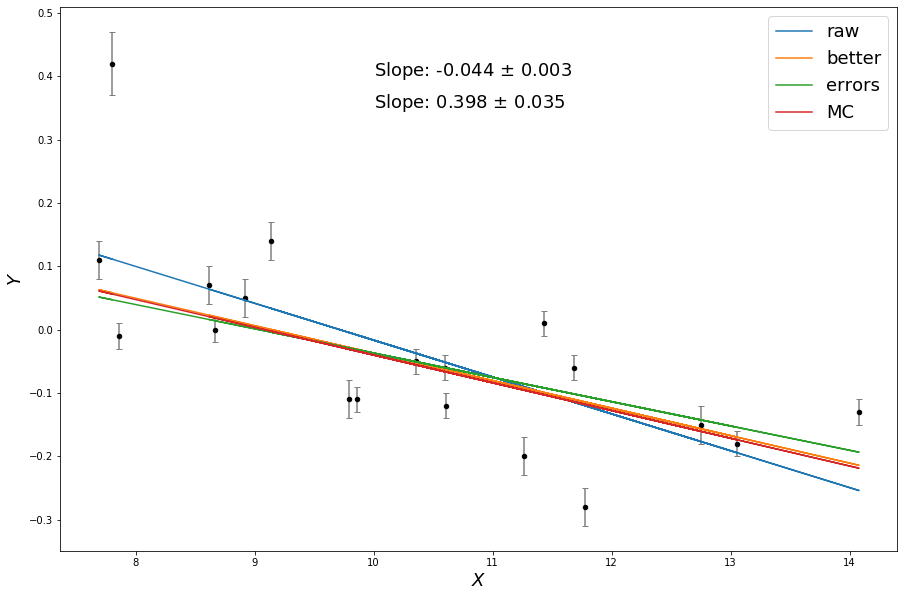

In [11]:
#now graphing with the outlier gone?
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(data['X'], data['Y'],s=20,c='black',zorder=2)
ax.errorbar(data['X'], data['Y'],yerr=data['Y_ERR'], c='tab:gray', 
            fmt='.', markersize=1, capsize=3 ,zorder=0)

slope, intercept = mcFit(xdat, ydat, ydat_err)

# along with out fits
ax.plot(data['X'], linear(data['X'], *popt), label='raw')
ax.plot(data['X'], linear(data['X'], *popt_clean), label='better')
ax.plot(data['X'], linear(data['X'], *popt_err), label='errors')
ax.plot(data['X'], linear(data['X'], np.mean(slope), np.mean(intercept)), label='MC')

ax.set_xlabel('$X$', fontsize=18)
ax.set_ylabel('$Y$', fontsize=18)

ax.text(10, 0.4, "Slope: {:+5.3f} $\pm$ {:5.3f}".format(np.mean(slope), np.std(slope)), fontsize=18)
ax.text(10, 0.35, "Slope: {:5.3f} $\pm$ {:5.3f}".format(np.mean(intercept), np.std(intercept)), fontsize=18)

plt.legend(loc='best', fontsize=18)
plt.show()
#MC is fitting close to the better fit, in fact its practically on top of it
#MC is better if there exists an x-uncertainty

0.39765949647136445


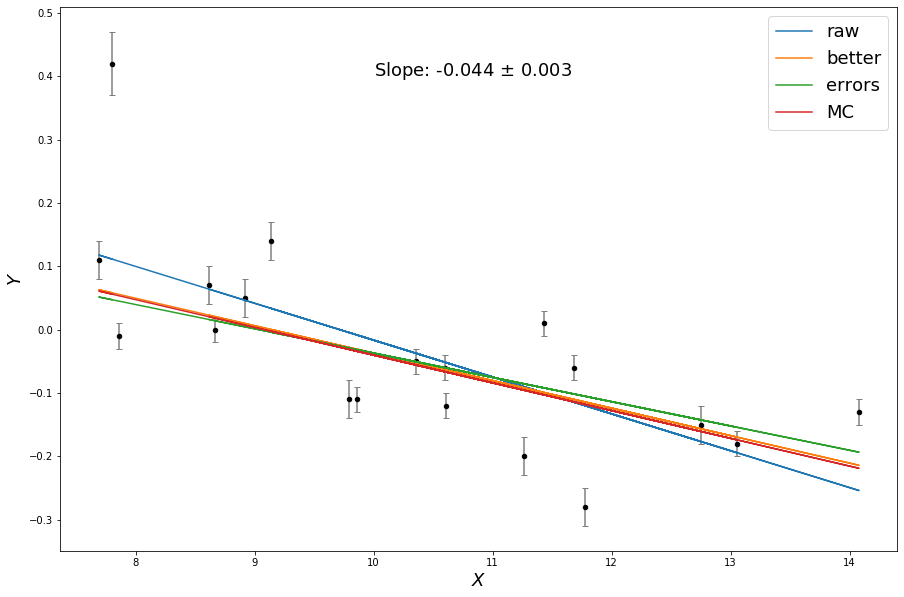

In [12]:
# here's an example of the use of lampda functions: simplifying or modifying another function
params, other = opt.curve_fit(lambda x, b: linear(x, np.mean(slope), b), xdat, ydat)

fixed_int = params[0]

print(fixed_int)

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(data['X'], data['Y'],s=20,c='black',zorder=2)
ax.errorbar(data['X'], data['Y'],yerr=data['Y_ERR'], c='tab:gray', 
            fmt='.', markersize=1, capsize=3 ,zorder=0)

# along with out fits
ax.plot(data['X'], linear(data['X'], *popt), label='raw')
ax.plot(data['X'], linear(data['X'], *popt_clean), label='better')
ax.plot(data['X'], linear(data['X'], *popt_err), label='errors')
ax.plot(data['X'], linear(data['X'], np.mean(slope), fixed_int), label='MC')

ax.set_xlabel('$X$', fontsize=18)
ax.set_ylabel('$Y$', fontsize=18)

ax.text(10, 0.4, "Slope: {:+5.3f} $\pm$ {:5.3f}".format(np.mean(slope), np.std(slope)), fontsize=18)
# ax.text(10, 0.35, "Slope: {:5.3f} $\pm$ {:5.3f}".format(np.mean(intercept), np.std(intercept)), fontsize=18)

plt.legend(loc='best', fontsize=18)
plt.show()

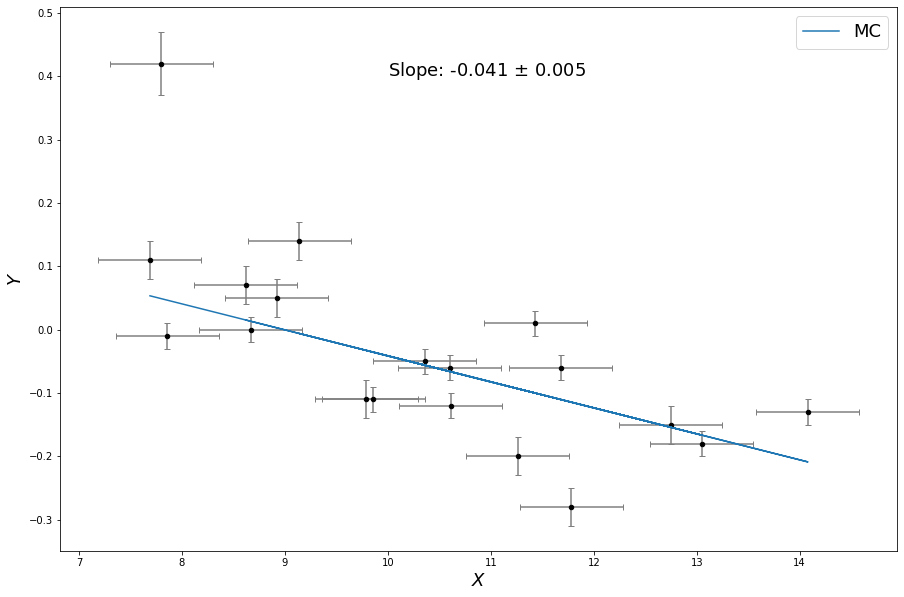

In [13]:
# exercise: we can't know the x data perfectly
# suppose the data have uniform x errors of 0.5
# use the MC technique to estimate the slope *AND* the uncertainty taking into account these errors
xdat=data['X']
y= data['Y']
yerr=data['Y_ERR']
z= data['Z']
zerr=data['Z_ERR']
maskz=z<0.05
zerrno=zerr[maskz]
zno=z[maskz]
mask= y<0.3
xno=xdat[mask]
xnoz=xdat[maskz]
yno=y[mask]
yerrno=yerr[mask]
def mcxerr(xno, yno,yerrno):
    slopea=[]
    x_fixc=[]
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        xweightx = np.random.randn(len(xno))
        yweighty=np.random.randn(len(yno))

        y_adj = yno + yerrno*yweighty  
        x_adj = xno + 0.5*xweightx 

        params, other = opt.curve_fit(linear, x_adj, y_adj)
        slopea.append(params[0])
        x_fixc.append(params[1])
    
    return slopea, x_fixc

slopexc, interceptxc = mcxerr(xno, yno, yerrno)    


fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(xdat, y,s=20,c='black',zorder=2)
ax.errorbar(xdat, y,yerr, xerr=0.5, c='tab:gray', 
            fmt='.', markersize=1, capsize=3 ,zorder=0)
ax.plot(xno, linear(xno, np.mean(slopexc), np.mean(interceptxc)), label='MC')
ax.set_xlabel('$X$', fontsize=18)
ax.set_ylabel('$Y$', fontsize=18)
ax.text( 10,0.4,"Slope: {:+5.3f} $\pm$ {:5.3f}".format(np.mean(slopexc), np.std(slopexc)), fontsize=18)
plt.legend(loc='best', fontsize=18)
plt.show()


# repeat this exercise, but supposing the errors INCREASE as we move away from X = 8 (as they do)
# to be precise: suppose X_ERR = |x - 8| /10, e.g. it increases by .1 per unit 

# plot both slopes. how does the fit change? 

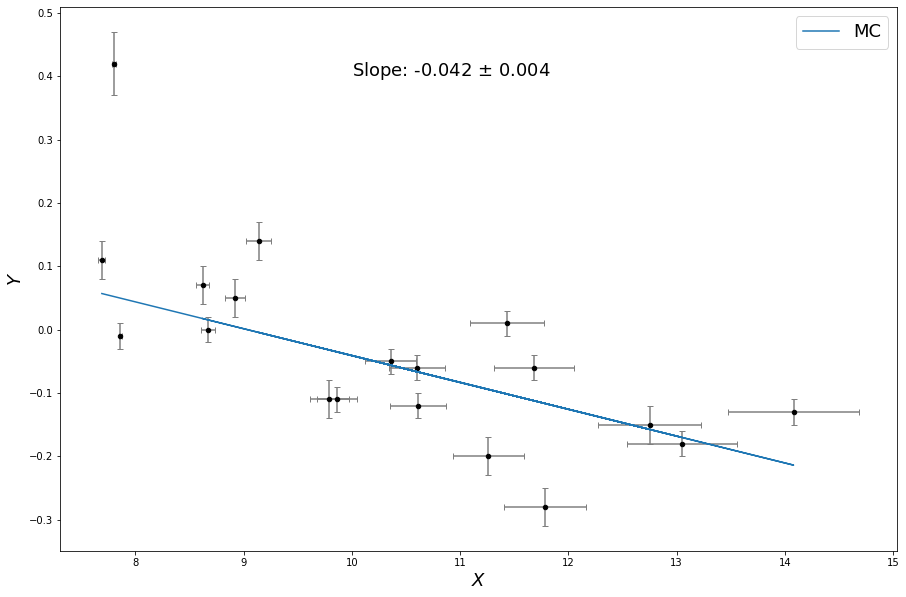

In [29]:
# repeat this exercise, but supposing the errors INCREASE as we move away from X = 8 (as they do)
# to be precise: suppose X_ERR = |x - 8| /10, e.g. it increases by .1 per unit 
# plot both slopes. how does the fit change? 
#xerr= (np.absolute(x-8))/10
def mcxerr(xno, yno, yerrno):
    slope=[]
    x_fix=[]
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        xweight = np.random.randn(len(xno))
        yweight =np.random.randn(len(yno))

        y_adj = yno + yerrno*yweight 
        x_adj = xno + (np.absolute(xno-8)/10)*xweight 

        params, other = opt.curve_fit(linear, x_adj, y_adj)
        slope.append(params[0])
        x_fix.append(params[1])
    
    return slope, x_fix

slopes, intercepts = mcxerr(xno, yno, yerrno)    


figa = plt.figure(figsize=(15,10))
ax = figa.add_subplot(111)
ax.scatter(xdat, y,s=20,c='black',zorder=2)
ax.errorbar(xdat, y,yerr, xerr=(np.absolute(xdat-8)/10), c='tab:gray', 
            fmt='.', markersize=1, capsize=3 ,zorder=0)
ax.plot(xno, linear(xno, np.mean(slopes), np.mean(intercepts)), label='MC')
ax.set_xlabel('$X$', fontsize=18)
ax.set_ylabel('$Y$', fontsize=18)
ax.text(10, 0.4, "Slope: {:+5.3f} $\pm$ {:5.3f}".format(np.mean(slopes), np.std(slopes)), fontsize=18)
plt.legend(loc='best', fontsize=18)
plt.show()

raw:  0.006717675713445995 -0.0687541345289338


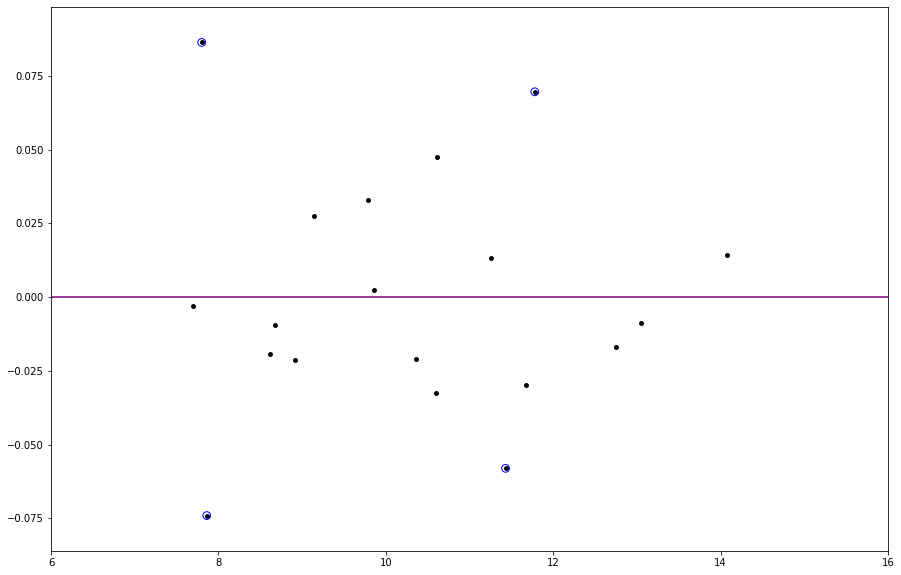

raw:  0.006717675713445995 -0.0687541345289338
outliers accounted for:  0.006766707931389952 -0.06938331415905287
the error stuff is: 0.005358711605572734 -0.058178020691403
mean slope: 0.0067, mean intercept: -0.0740


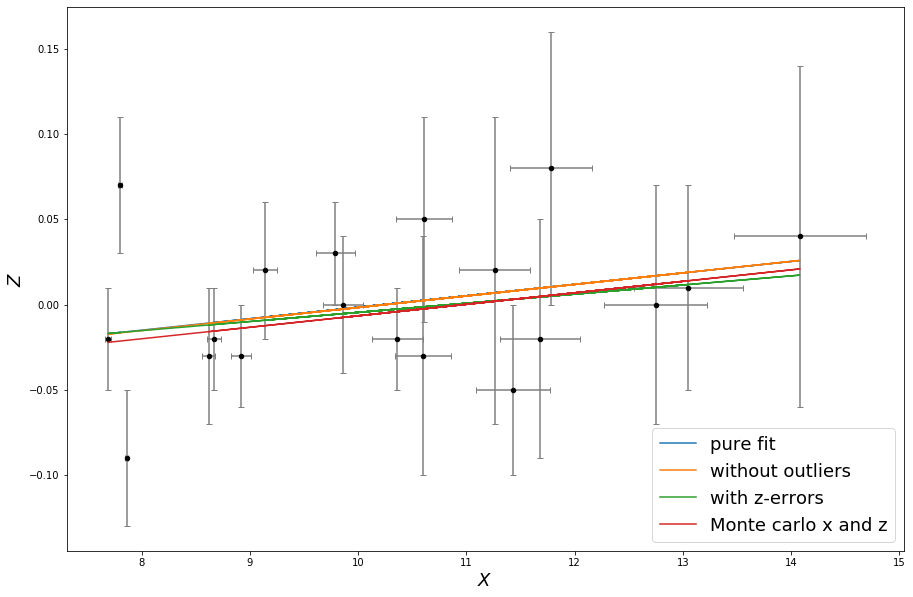

'figa = plt.figure(figsize=(15,10))\nax = figa.add_subplot(111)\nax.scatter(xdat, z,s=20,c=\'black\',zorder=2)\nax.errorbar(xdat, z,zerr, xerr=np.absolute, c=\'tab:gray\', \n            fmt=\'.\', markersize=1, capsize=3 ,zorder=0)\nax.plot(xnoz, linear(xnoz, np.mean(slopez), np.mean(interceptz)), label=\'MC\')\nax.set_xlabel(\'$X$\', fontsize=18)\nax.set_ylabel(\'$Y$\', fontsize=18)\nax.text(10, 0.4, "Slope: {:+5.3f} $\\pm$ {:5.3f}".format(np.mean(slopez), np.std(slopez)), fontsize=18)\nplt.legend(loc=\'best\', fontsize=18)\nplt.show()\n#the MC line is more vertical than the other points\n#the blue line pure fit is hidding under the without outliers fit'

In [33]:
# Repeat the above anaysis for X vs. Z data, including uncertainties!!
#run through class notes and replicate 
#with x errors
# let's do a linear fit to the data

popt, pcov = opt.curve_fit(linear, xdat, z)
print("raw: ", *popt)


'''#writing figures this way is so elongated why cant we just write plt.scatter
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(xdat,z,s=20,c='black')
ax.plot(xdat,linear(xdat, *popt))
plt.show()'''
residual = z-linear(xdat,*popt)
xm = np.linspace(5,20,1000)
#linspace is like arange, arange might be more friendly, but it is up to the person

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(xdat,residual,s=15,c='black')
ax.plot(xm,xm*0.0,color='purple')
ax.set_xlim(6,16)

#highlighting the residuals that are further than 0.05 away from the value
outlier = np.absolute(residual)>0.05
ax.scatter(xdat[outlier],residual[outlier],s=60,edgecolor='b',facecolor='none')
#line is flat because line-line is no line
plt.show()
#there is 4 outliers!!

# our values for the raw data above:
# slope:    0.00671768
# intercept: -0.0687541345
popt, pcov = opt.curve_fit(linear, xdat, z)
print("raw: ", *popt)

# we can use curve_fit to de-weight outliers automatically

# note, result is dependent on choice of loss function
# need to see method to trf in order to use least_squares instead of leastsq
# function removes outliers 
popt_clean, pcov = opt.curve_fit(linear, xdat, z, method='trf', 
                                 loss='arctan', f_scale=0.20)
print("outliers accounted for: ", *popt_clean)

'''#plotting the two different fits
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(xdat,z,s=20,c='black',zorder=2)
# cleaner error bars than last time, play around with the parameters
#just reading the errors from the table
ax.errorbar(xdat,z,zerr, c='tab:gray', 
            fmt='.', markersize=1, capsize=3 ,zorder=0)

# along with our fits
ax.plot(xdat,linear(xdat, *popt), label='raw line')
ax.plot(xdat,linear(xdat, *popt_clean), label='excluding outliers')

ax.set_xlabel('$X$', fontsize=18)
ax.set_ylabel('$Z$', fontsize=18)

plt.legend(loc='best', fontsize=18)
plt.show()
#orange line is the line without the outlier, the fit is better'''
#not accounting for errors at all'''

# lets account for the errors
# by pasing sigma, scipy knows to weight data according to their errors 
# naturally, sigma is expected to be the same size and correspond to y
# notice: this only accounts for y error
popt_err, pcov = opt.curve_fit(linear, xdat, z, sigma=zerr)
print('the error stuff is:',*popt_err)

'''fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(xdat,z,s=20,c='black',zorder=2)
#here is the error bar graph piece
ax.errorbar(xdat,z, zerr, c='tab:gray', 
            fmt='.', markersize=1, capsize=3 ,zorder=0)'''

'''# along with out fits
ax.plot(xdat,linear(xdat, *popt), label='no edits')
ax.plot(xdat,linear(xdat, *popt_clean), label='without outliers')
ax.plot(xdat,linear(xdat, *popt_err), label='accounting for errors')

ax.set_xlabel('$X$', fontsize=18)
ax.set_ylabel('$Z$', fontsize=18)

plt.legend(loc='best', fontsize=18)
plt.show()
#notice the line has been flattening over time'''

xdat=data['X']
y= data['Y']
yerr=data['Y_ERR']
z= data['Z']
zerr=data['Z_ERR']
maskz=np.absolute(z)<0.05
#mazk= z>-0.05
zerrno=zerr[maskz]
#zerrnoz=zerrno[mazk]
zno=z[maskz]
#znoz=zno[mazk]
mask= y<0.3
xno=xdat[mask]
xnoz=xdat[maskz]
#xnozz=xnox[mazk]
yno=y[mask]
yerrno=yerr[mask]

def mczxerr(xnoz, zno, zerrno):
    slopez=[]
    z_fix=[]
    itersz = 500 
    for i in range(itersz):
        # remember random normal distribution (Gaussian)
        xweight = np.random.randn(len(xnoz))
        zweight =np.random.randn(len(zno))

        z_adj = zno + zerrno*zweight 
        x_adj = xnoz + (np.absolute(xnoz-8.0)/10.0)*xweight 

        params, other = opt.curve_fit(linear, x_adj, z_adj)
        slopez.append(params[0])
        z_fix.append(params[1])
    
    return slopez, z_fix

slopez, interceptz = mczxerr(xnoz, zno, zerrno)


'''figz = plt.figure(figsize=(15,10))
ax = figz.add_subplot(111)
ax.scatter(xdat, z,s=20,c='black',zorder=2)
ax.errorbar(xdat, z,zerr, xerr=0.5, c='tab:gray', 
            fmt='.', markersize=1, capsize=3 ,zorder=0)
ax.plot(xno, linear(xnoz, np.mean(slopez), np.mean(interceptz)), label='MC')
ax.set_xlabel('$X$', fontsize=18)
ax.set_ylabel('$Z$', fontsize=18)
ax.text(10, 0.4, "Slope: {:+5.3f} $\pm$ {:5.3f}".format(np.mean(slopez), np.std(slopez)), fontsize=18)
plt.legend(loc='best', fontsize=18)
plt.show()'''

print('mean slope: {:6.4f}, mean intercept: {:6.4f}'.format(np.mean(slopez), np.mean(interceptz)))

figz = plt.figure(figsize=(15,10))
ax = figz.add_subplot(111)
ax.scatter(xdat, z,s=20,c='black',zorder=2)
ax.errorbar(xdat, z,zerr, xerr=(np.absolute(xdat-8)/10), c='tab:gray', 
            fmt='.', markersize=1, capsize=3 ,zorder=0)

# along with our fits
#this is all the graph fits
ax.plot(xdat, linear(xdat, *popt), label='pure fit')
ax.plot(xdat, linear(xdat, *popt_clean), label='without outliers')
ax.plot(xdat, linear(xdat, *popt_err), label='with z-errors ')
ax.plot(xnoz, linear(xnoz, np.mean(slopez), np.mean(interceptz)), label='Monte carlo x and z')

ax.set_xlabel('$X$', fontsize=18)
ax.set_ylabel('$Z$', fontsize=18)

plt.legend(loc='best', fontsize=18)
plt.show()

'''figa = plt.figure(figsize=(15,10))
ax = figa.add_subplot(111)
ax.scatter(xdat, z,s=20,c='black',zorder=2)
ax.errorbar(xdat, z,zerr, xerr=np.absolute, c='tab:gray', 
            fmt='.', markersize=1, capsize=3 ,zorder=0)
ax.plot(xnoz, linear(xnoz, np.mean(slopez), np.mean(interceptz)), label='MC')
ax.set_xlabel('$X$', fontsize=18)
ax.set_ylabel('$Y$', fontsize=18)
ax.text(10, 0.4, "Slope: {:+5.3f} $\pm$ {:5.3f}".format(np.mean(slopez), np.std(slopez)), fontsize=18)
plt.legend(loc='best', fontsize=18)
plt.show()
#the MC line is more vertical than the other points
#the blue line pure fit is hidding under the without outliers fit'''


mean slope: 0.0059, mean intercept: -0.0653


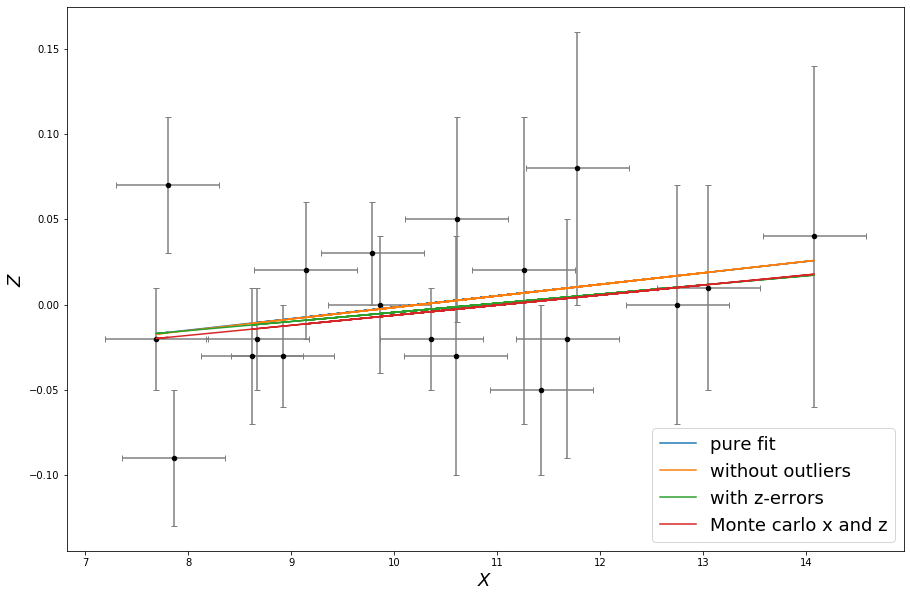

In [32]:
def mczxerr(xnoz, zno, zerrno):
    slopezz=[]
    zz_fix=[]
    itersz = 500 
    for i in range(itersz):
        # remember random normal distribution (Gaussian)
        xweight = np.random.randn(len(xnoz))
        zweight =np.random.randn(len(zno))

        z_adj = zno + zerrno*zweight 
        x_adjz = xnoz + 0.5*xweight 

        params, other = opt.curve_fit(linear, x_adjz, z_adj)
        slopezz.append(params[0])
        zz_fix.append(params[1])
    
    return slopezz, zz_fix

slopesz, interceptsz = mczxerr(xnoz, zno, zerrno)



print('mean slope: {:6.4f}, mean intercept: {:6.4f}'.format(np.mean(slopesz), np.mean(interceptsz)))

figz = plt.figure(figsize=(15,10))
ax = figz.add_subplot(111)
ax.scatter(xdat, z,s=20,c='black',zorder=2)
ax.errorbar(xdat, z,zerr, xerr=0.5, c='tab:gray', 
            fmt='.', markersize=1, capsize=3 ,zorder=0)

# along with our fits
#this is all the graph fits
ax.plot(xdat, linear(xdat, *popt), label='pure fit')
ax.plot(xdat, linear(xdat, *popt_clean), label='without outliers')
ax.plot(xdat, linear(xdat, *popt_err), label='with z-errors ')
ax.plot(xdat, linear(xdat, np.mean(slopesz), np.mean(interceptsz)), label='Monte carlo x and z')

ax.set_xlabel('$X$', fontsize=18)
ax.set_ylabel('$Z$', fontsize=18)

plt.legend(loc='best', fontsize=18)
plt.show()
#the MC line is more vertical than the other points